In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
ten = pd.read_csv("tendulkar_ODI.csv")

In [21]:
ten.head(5)

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [22]:
ten.dtypes

Unnamed: 0     int64
Runs          object
Mins          object
BF            object
4s            object
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
dtype: object

In [23]:
ten.Runs.unique()

array(['0', '36', '19', '31', '53', '30', 'DNB', '4', '62', '1', '57',
       '21', '69', '11', '84', '39', '15', '10', '22', '32', '23', '82*',
       '3', '24', '5', '34', '8*', '25', '26*', '2', '28*', '11*', '52',
       '82', '63', '40', '6', '8', '115', '66', '54', '88', '105', '13',
       '7', '65', '127*', '70', '90', '137', '110', '64', '28', '67',
       '114', '14', '45', '44', '65*', '9', '117', '27', '100', '33',
       '18', '100*', '17', '128', '29', '37', '120', '186*', '12', '26',
       '122', '93', '146', '35', '139', '70*', '101', '38', '68', '87*',
       '34*', '81', '89', '102', '86', '141', '74', '16', '47', '123',
       '67*', '42', '95', '55', '60', 'TDNB', '99', '71', '94', '43',
       '79', '72', '97', '117*', '91', '50', '20', '163*', '138', '175',
       '96*', '200*', '111', '85'], dtype=object)

In [24]:
def clean(x):
    if x.isnumeric():
        y = x
    elif '*' in x:
        y = x.replace('*','')
    else:
        y = 0
    return int(y)

ten["Runs"] = ten["Runs"].apply(clean)

In [25]:
ten.Runs.value_counts()

1      16
0      15
2      14
4       9
21      8
       ..
87      1
81      1
89      1
102     1
85      1
Name: Runs, Length: 105, dtype: int64

In [30]:
?plt.hist

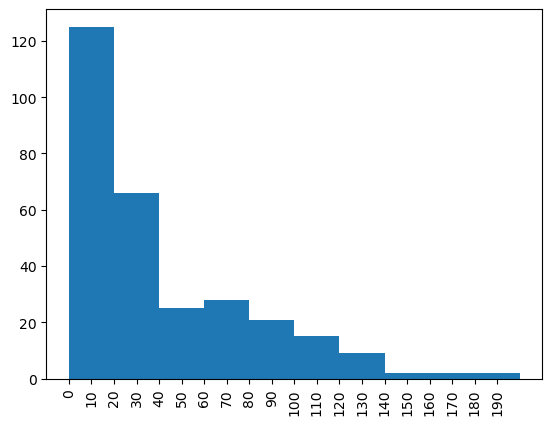

In [38]:
xticks = (0,200,10)
plt.hist(ten.Runs,bins = 10)
ticks = np.arange(0, 200, 10)
labels = [i for i in ticks]
plt.xticks(ticks, labels)
plt.xticks(rotation=90)
plt.show()

In [40]:
ten['4s'].unique()

array(['0', '5', '1', '3', '7', '-', '2', '8', '6', '4', '15', '9', '13',
       '10', '14', '11', '20', '12', '19', '17', '16', '25'], dtype=object)

In [41]:
def clean4s(x):
    y = x.replace('-','0')
    return int(y)

ten["4s"] = ten["4s"].apply(clean4s)

In [42]:
ten['4s'].unique()

array([ 0,  5,  1,  3,  7,  2,  8,  6,  4, 15,  9, 13, 10, 14, 11, 20, 12,
       19, 17, 16, 25])

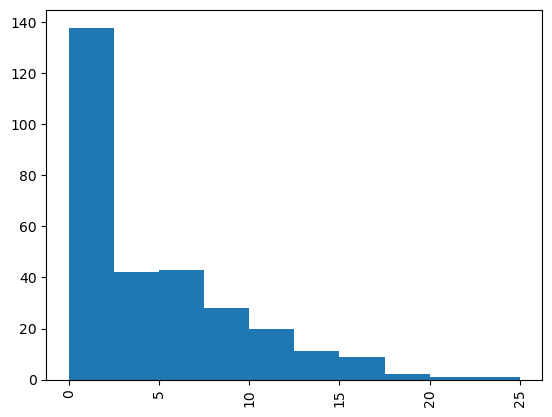

In [43]:
plt.hist(ten['4s'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Media polularity dataset analysis

In [95]:
df = pd.read_csv('popularity.csv',header = 0)

In [110]:
df[' shares'].quantile(np.arange(0.1, 1, 0.1))

0.1     708.0
0.2     870.6
0.3    1000.0
0.4    1200.0
0.5    1400.0
0.6    1800.0
0.7    2300.0
0.8    3400.0
0.9    6200.0
Name:  shares, dtype: float64

In [83]:
df = df[df[' shares']<(df[' shares'].quantile(0.78))]
df.shape

(30718, 61)

In [58]:
arr = np.array(df[' num_keywords'])

In [59]:
arr

array([5., 4., 6., ..., 8., 5., 4.])

In [61]:
from scipy import stats as st
st.mode(arr)

/var/folders/fj/4trbrrhn72b12j1r1vhm2g080000gn/T/ipykernel_21031/1248898858.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(arr)


ModeResult(mode=array([7.]), count=array([7322]))

In [64]:
arrshares = np.array(df[' shares'])
np.mean(arrshares)

3395.3801836343455

In [66]:
np.median(arrshares)

1400.0

In [69]:
np.max(arrshares)

843300

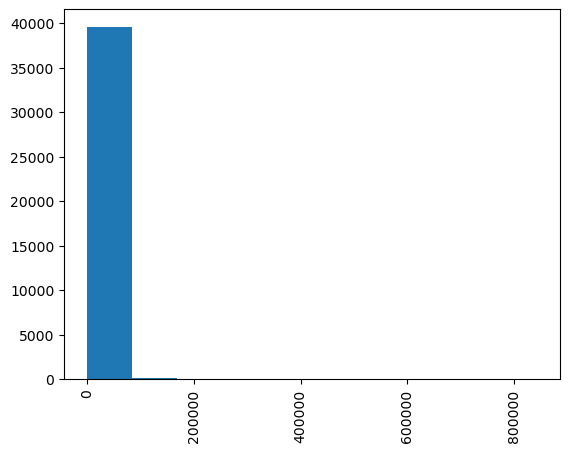

In [67]:
plt.hist(df[' shares'])
plt.xticks(rotation=90)
plt.show()

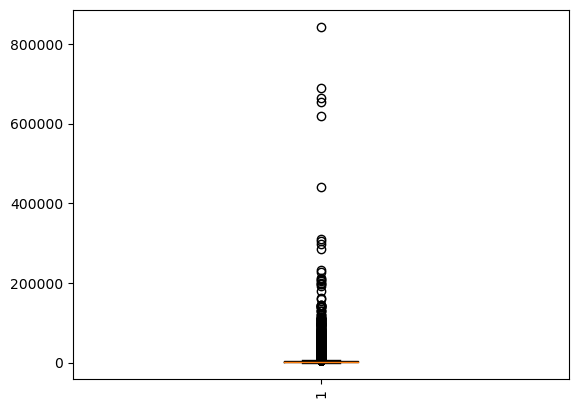

In [68]:
plt.boxplot(df[' shares'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
q1 = df1['shares']

In [125]:
pop = pd.read_csv('popularity.csv',header = 0)
pop.shape

(39644, 61)

In [126]:
pop = pop[~(pop[' shares']>(pop[' shares'].quantile(0.95)))]
pop.shape

(37663, 61)

In [127]:
pop[' shares'].mean()

2074.334386533202

In [128]:
pop[' shares'].std()

1871.8141388442016

In [130]:
pop.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,...,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000
mean,354.205427,10.394658,547.993601,0.549110,0.998858,0.690760,10.747259,3.301967,4.437405,1.214216,...,0.095078,0.755888,-0.258338,-0.520399,-0.107103,0.279444,0.070141,0.341902,0.153909,2074.334387
std,214.867086,2.112319,467.255173,3.611926,5.366809,3.349307,11.127499,3.855264,8.203935,4.011003,...,0.070550,0.246801,0.126841,0.289643,0.094539,0.322447,0.262575,0.188975,0.224003,1871.814139
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,163.000000,9.000000,248.000000,0.470776,1.000000,0.626263,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.326389,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,927.000000
50%,338.000000,10.000000,413.000000,0.538690,1.000000,0.690583,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.251852,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,545.000000,12.000000,718.000000,0.607477,1.000000,0.754386,13.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2400.000000
max,731.000000,23.000000,7764.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,10800.000000


In [ ]:
pop = pd.read_csv('popularity.csv',header = 0)
pop.shape